In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import asyncio
import aiohttp
import json
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import os
import pandas as pd
import requests
import seaborn as sns
from ast import literal_eval
from collections import defaultdict
pd.options.display.max_rows = 200
pd.options.display.max_columns = 50
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
expts = pd.read_excel('/Users/hitz/encode-prod/Experiments_2017_11_30_perspectives_hacked.xls')


In [3]:
expts['Date released'] = expts['Date released'].apply(lambda x: pd.to_datetime(x))

In [4]:
expts.dtypes

target.investigated_as            object
Accession                         object
award.rfa                         object
award.pi.title                    object
Assay Type                        object
Assay Nickname                    object
Target label                      object
Target gene                       object
Biosample summary                 object
Biosample                         object
Lab                               object
Project                           object
Species                           object
Biosample type                    object
Date released             datetime64[ns]
Assay type                        object
Month released                    object
dtype: object

## Distributions of metrics

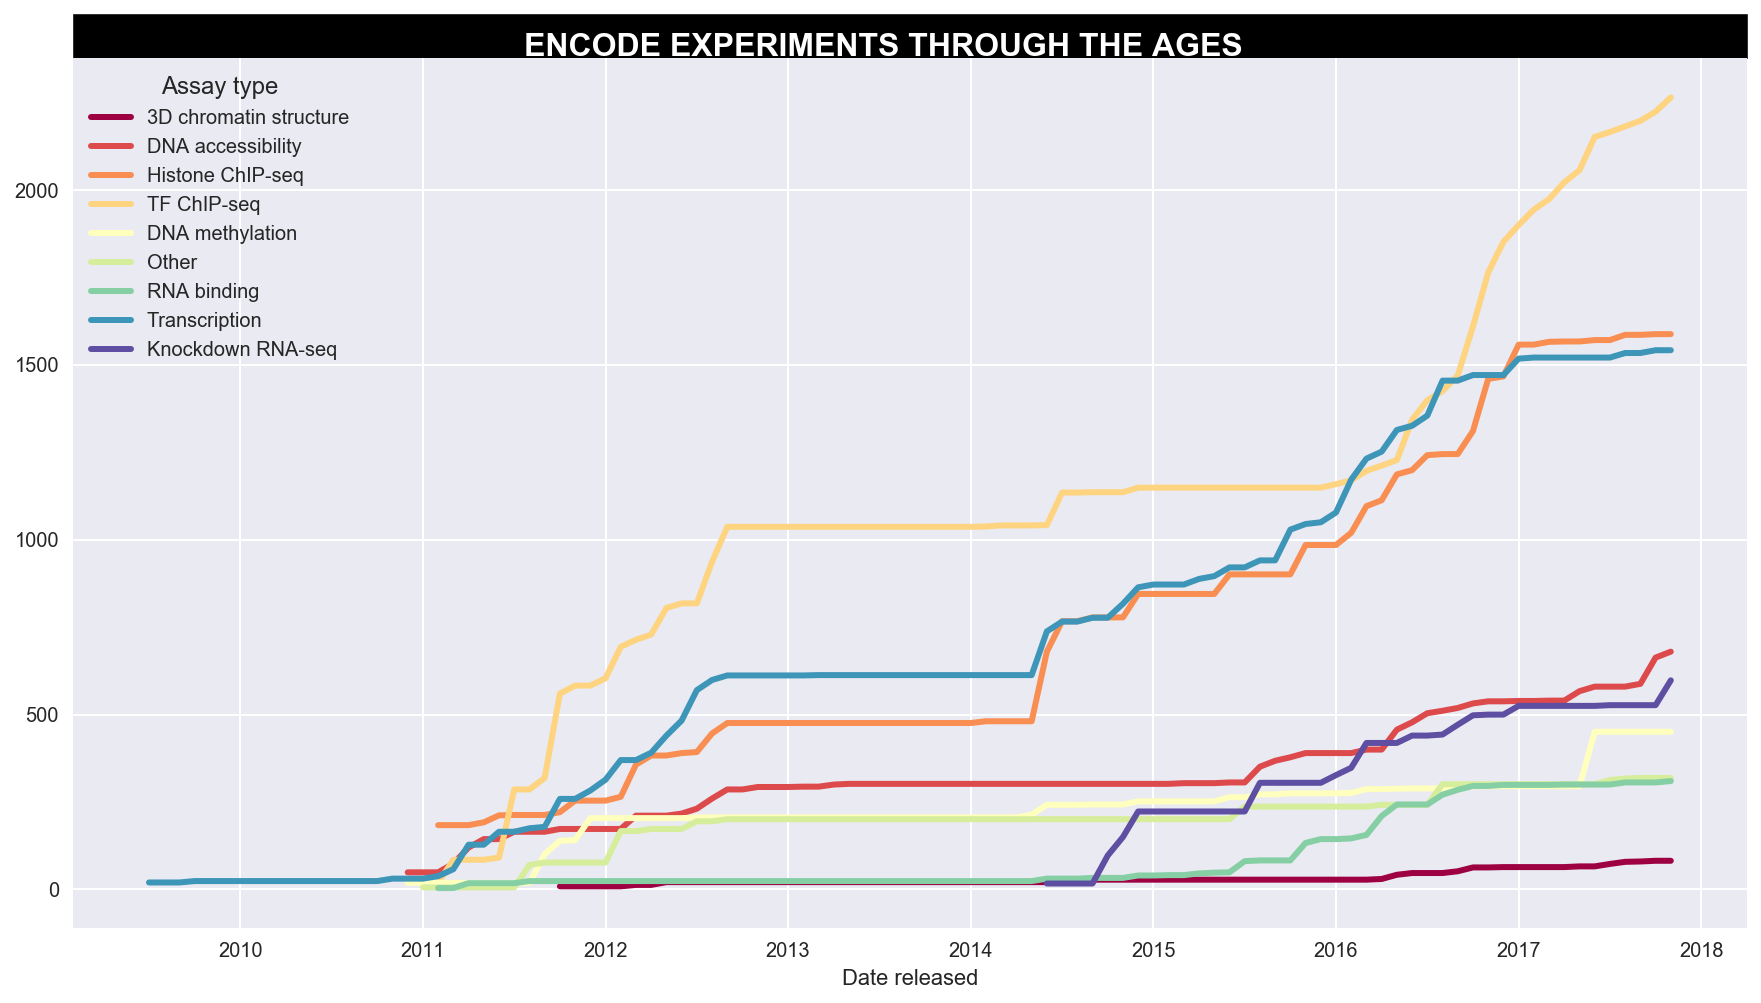

In [5]:
cols = expts['Assay type'].unique()
sns.set(style="darkgrid", font="Arial")
fig, ax = plt.subplots(figsize=(15,8))
(
    expts.groupby(['Assay type', 'Date released'])
         .count()
         .unstack('Assay type')['Accession'][cols]
         .resample('M').sum()
         .cumsum()
         .fillna(method='ffill')
         .plot(colormap='Spectral',lw=3, ax=ax)
)
#fig.set_facecolor((0.4,0.4,0.4,1))
fig.patches.append(
    patches.Rectangle(
        (0,1),
        1,
        0.05,
        color='black',#'#CCCCCC',
        transform=ax.transAxes,
        zorder=-1
    )
)
fig.suptitle('ENCODE EXPERIMENTS THROUGH THE AGES',
              size=16,
              family='Arial',
              fontweight='bold',
              color='white',
              y=0.902);

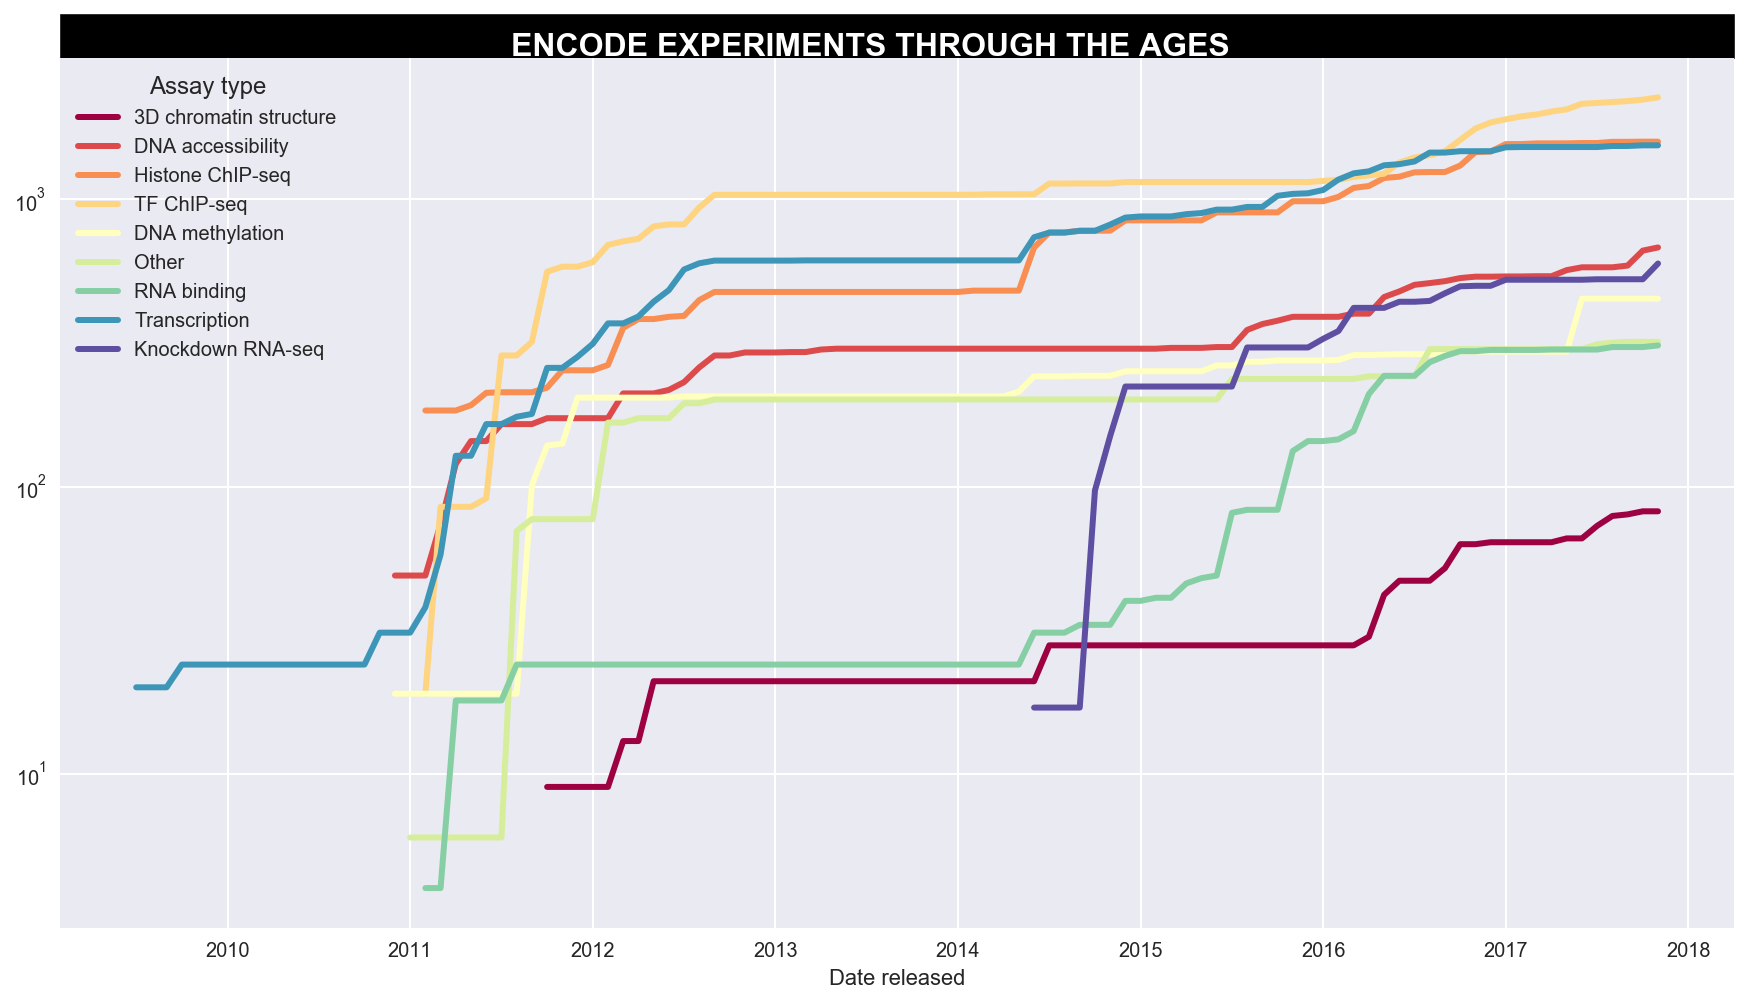

In [6]:
cols = expts['Assay type'].unique()
sns.set(style="darkgrid", font="Arial")
fig, ax = plt.subplots(figsize=(15,8))
(
    expts.groupby(['Assay type', 'Date released'])
         .count()
         .unstack('Assay type')['Accession'][cols]
         .resample('M').sum()
         .cumsum()
         .fillna(method='ffill')
         .plot(colormap='Spectral',lw=3, ax=ax,logy=True)
)
#fig.set_facecolor((0.4,0.4,0.4,1))
fig.patches.append(
    patches.Rectangle(
        (0,1),
        1,
        0.05,
        color='black',#'#CCCCCC',
        transform=ax.transAxes,
        zorder=-1
    )
)
fig.suptitle('ENCODE EXPERIMENTS THROUGH THE AGES',
              size=16,
              family='Arial',
              fontweight='bold',
              color='white',
              y=0.902);

In [7]:
expts['Assay type'].unique()

array(['3D chromatin structure', 'DNA accessibility', 'Histone ChIP-seq',
       'TF ChIP-seq', 'DNA methylation', 'Other', 'RNA binding',
       'Transcription', 'Knockdown RNA-seq'], dtype=object)

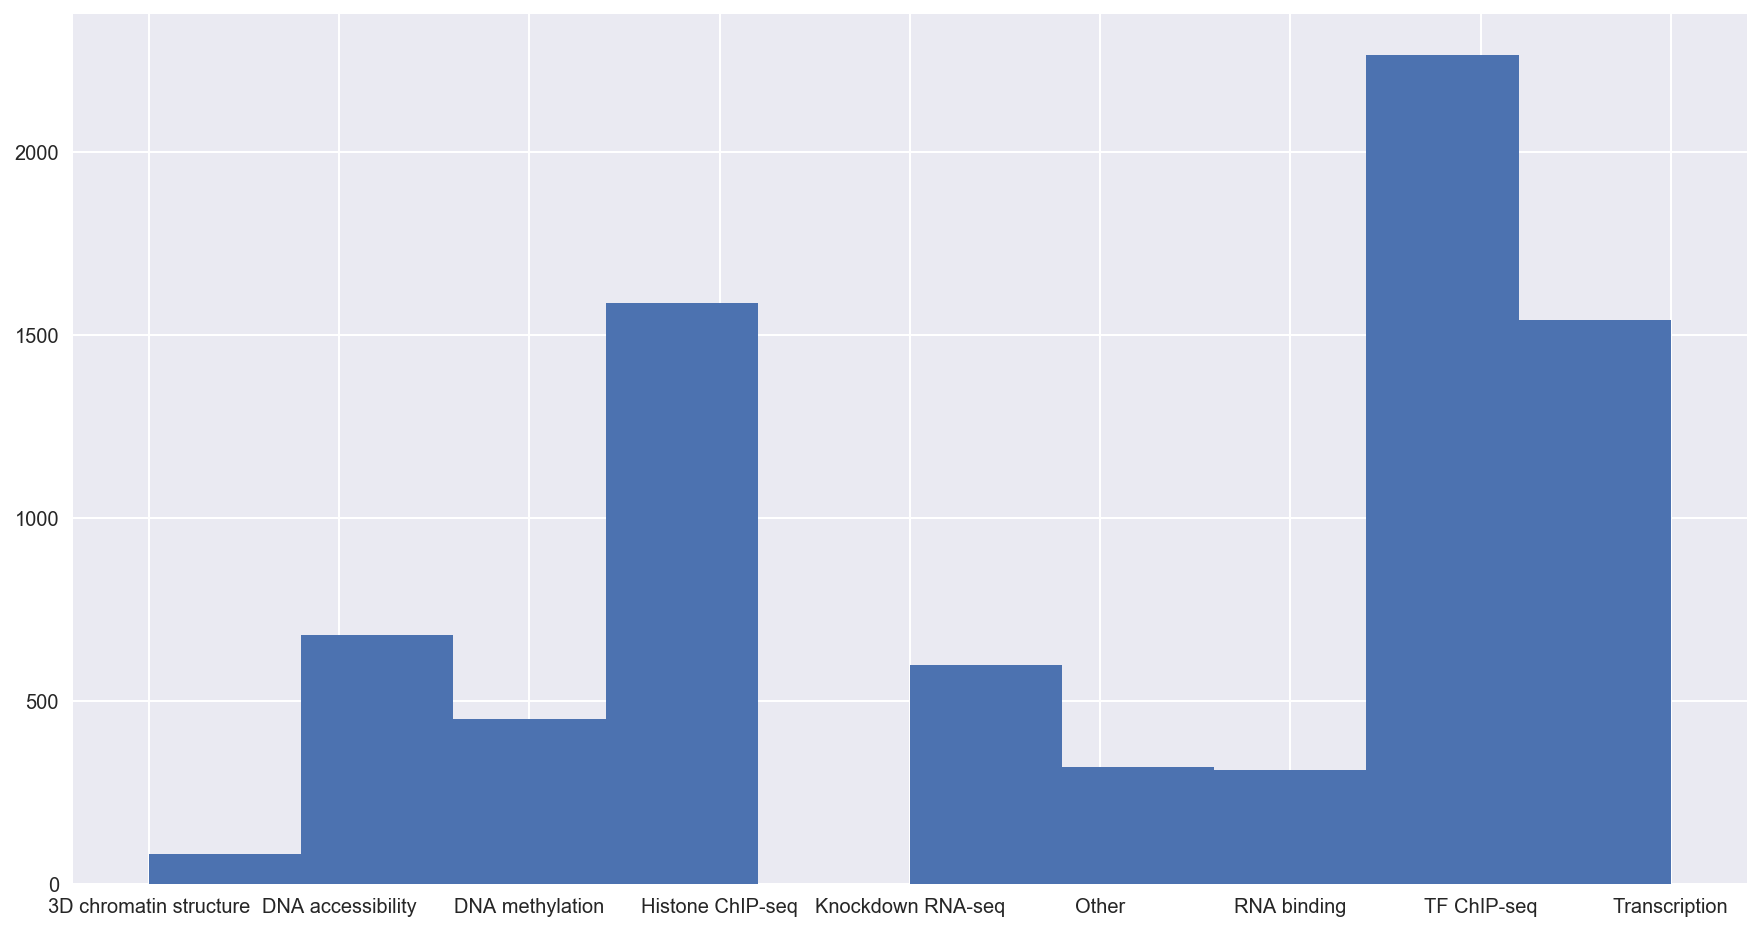

In [8]:
expts['Assay type'].hist(figsize=(15,8))

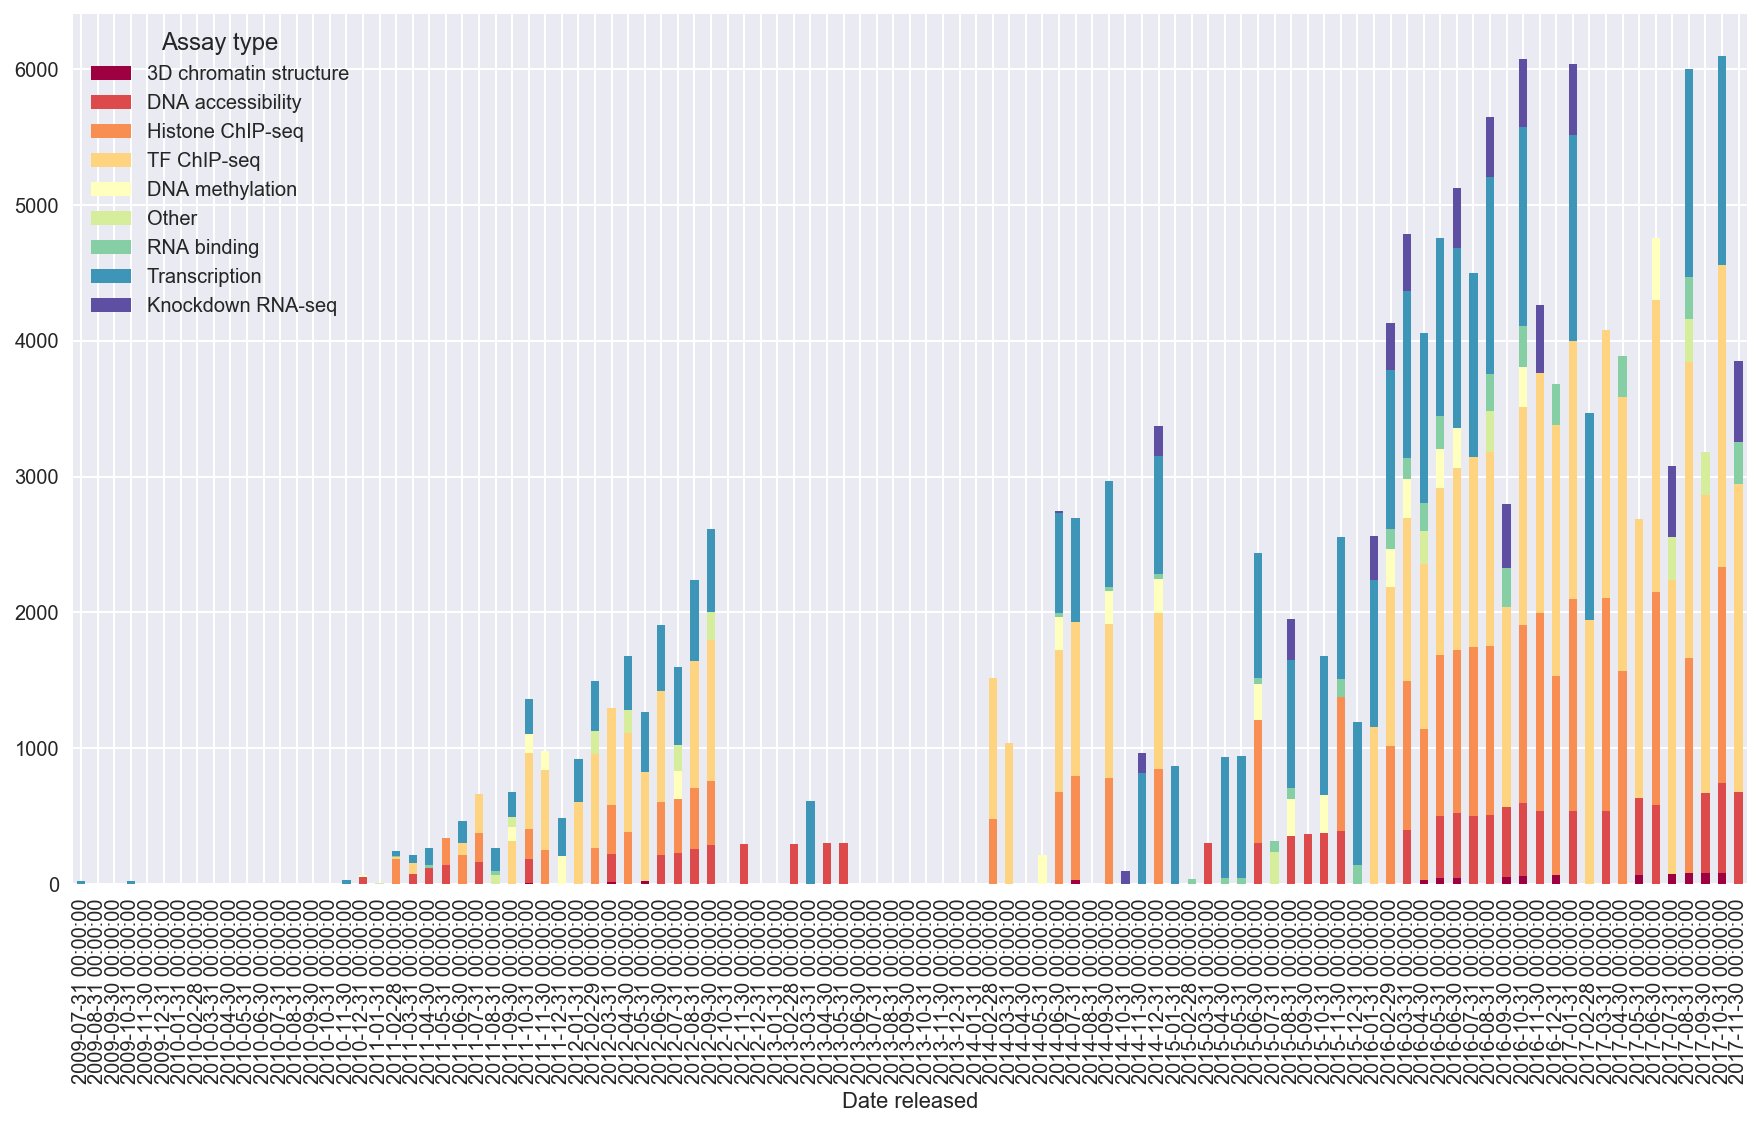

In [9]:
(
    expts.groupby(['Assay type', 'Date released'])
        .count()
        .unstack('Assay type')['Accession'][cols]
        .resample('M').sum()
        .cumsum()
        .plot.bar(stacked=True, figsize=(15,8), colormap='Spectral')
)

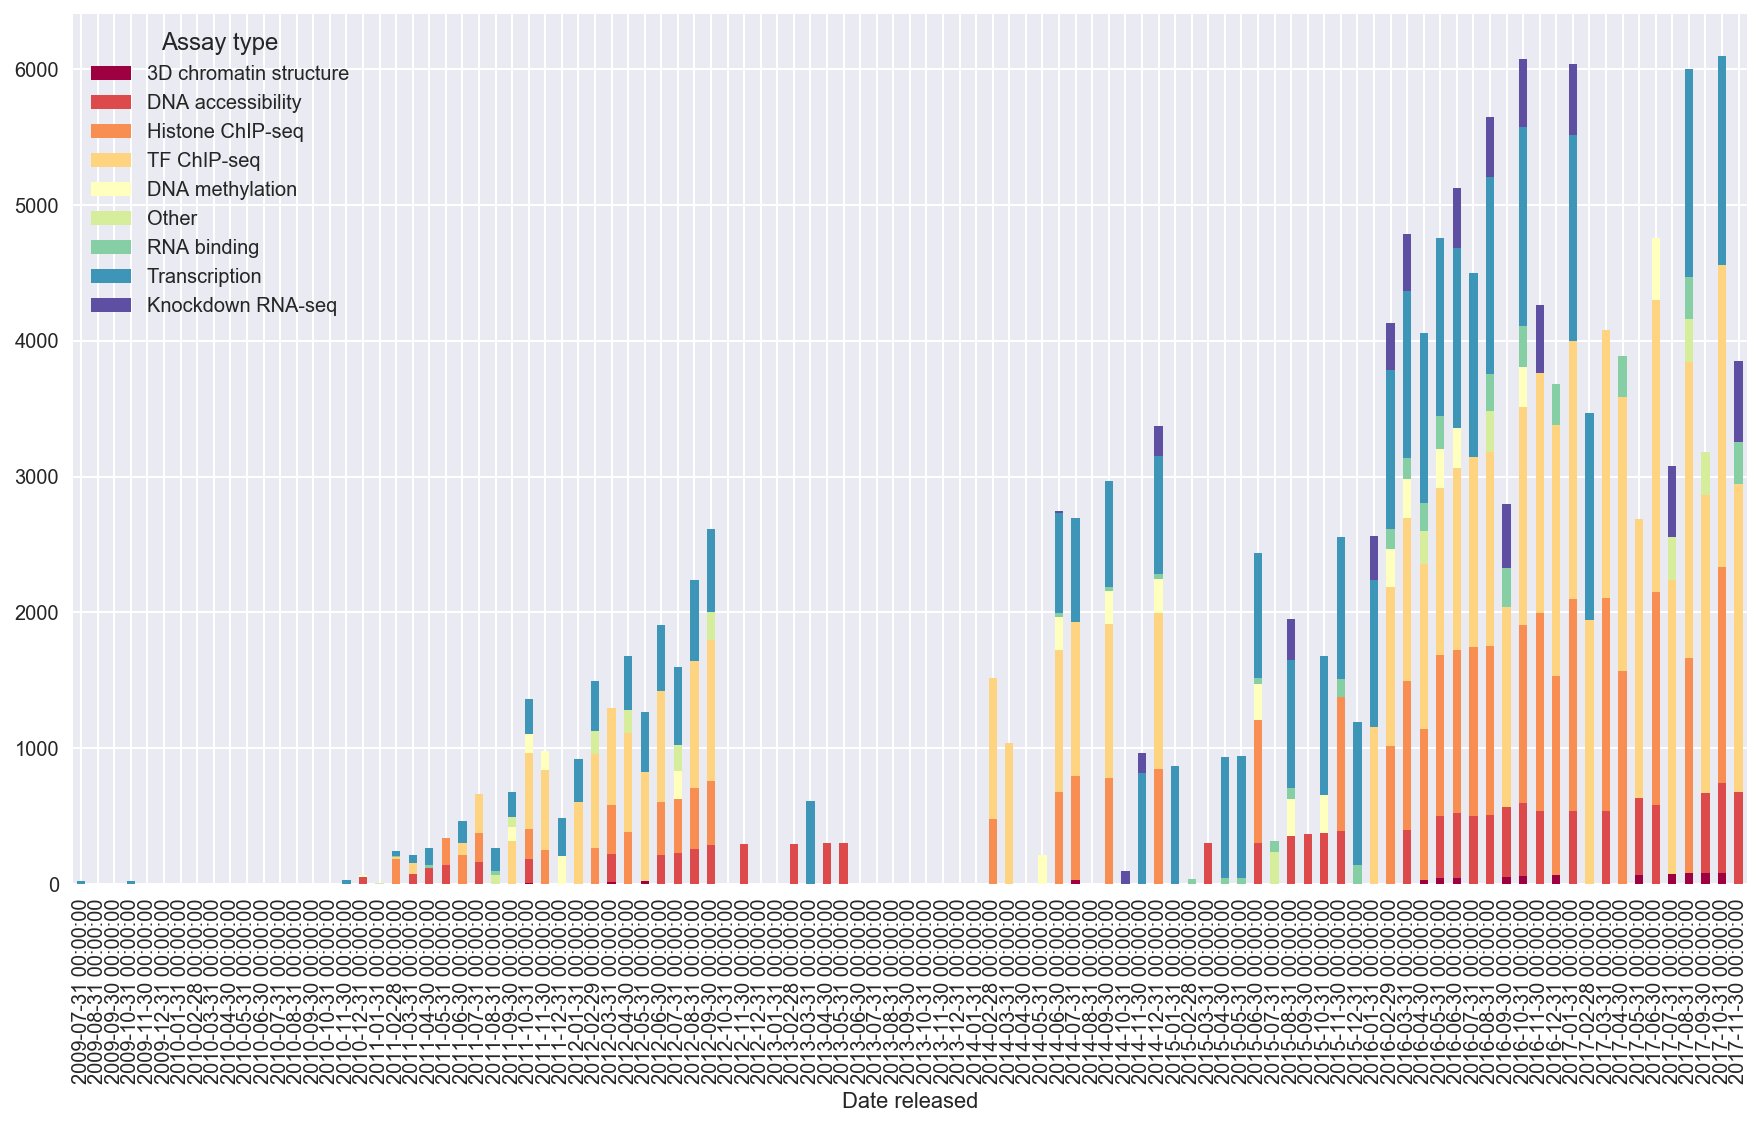

In [10]:
(
    expts.groupby(['Assay type', 'Date released'])
        .count()
        .unstack('Assay type')['Accession'][cols]
        .resample('M').sum()
        .cumsum()
        .plot.bar(stacked=True, figsize=(15,8), colormap='Spectral')
)

In [11]:
from pylab import *

def rstyle(ax): 
    """Styles an axes to appear like ggplot2
    Must be called after all plot and axis manipulation operations have been carried out (needs to know final tick spacing)
    """
    #set the style of the major and minor grid lines, filled blocks
    ax.grid(True, 'major', color='w', linestyle='-', linewidth=1.4)
    ax.grid(True, 'minor', color='0.92', linestyle='-', linewidth=0.7)
    ax.patch.set_facecolor('0.85')
    ax.set_axisbelow(True)
    
    #set minor tick spacing to 1/2 of the major ticks
    ax.xaxis.set_minor_locator(MultipleLocator( (plt.xticks()[0][1]-plt.xticks()[0][0]) / 2.0 ))
    ax.yaxis.set_minor_locator(MultipleLocator( (plt.yticks()[0][1]-plt.yticks()[0][0]) / 2.0 ))
    
    #remove axis border
    for child in ax.get_children():
        if isinstance(child, matplotlib.spines.Spine):
            child.set_alpha(0)
       
    #restyle the tick lines
    for line in ax.get_xticklines() + ax.get_yticklines():
        line.set_markersize(5)
        line.set_color("gray")
        line.set_markeredgewidth(1.4)
    
    #remove the minor tick lines    
    for line in ax.xaxis.get_ticklines(minor=True) + ax.yaxis.get_ticklines(minor=True):
        line.set_markersize(0)
    
    #only show bottom left ticks, pointing out of axis
    rcParams['xtick.direction'] = 'out'
    rcParams['ytick.direction'] = 'out'
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    
    
    if ax.legend_ is None:
        lg = ax.legend_
        lg.get_frame().set_linewidth(0)
        lg.get_frame().set_alpha(0.5)


In [12]:
top_three = expts['Assay type'].value_counts().keys()[:3]


In [13]:
expts = pd.read_excel('/Users/hitz/encode-prod/Experiments_2017_11_30_perspectives_hacked_alt1.xls')

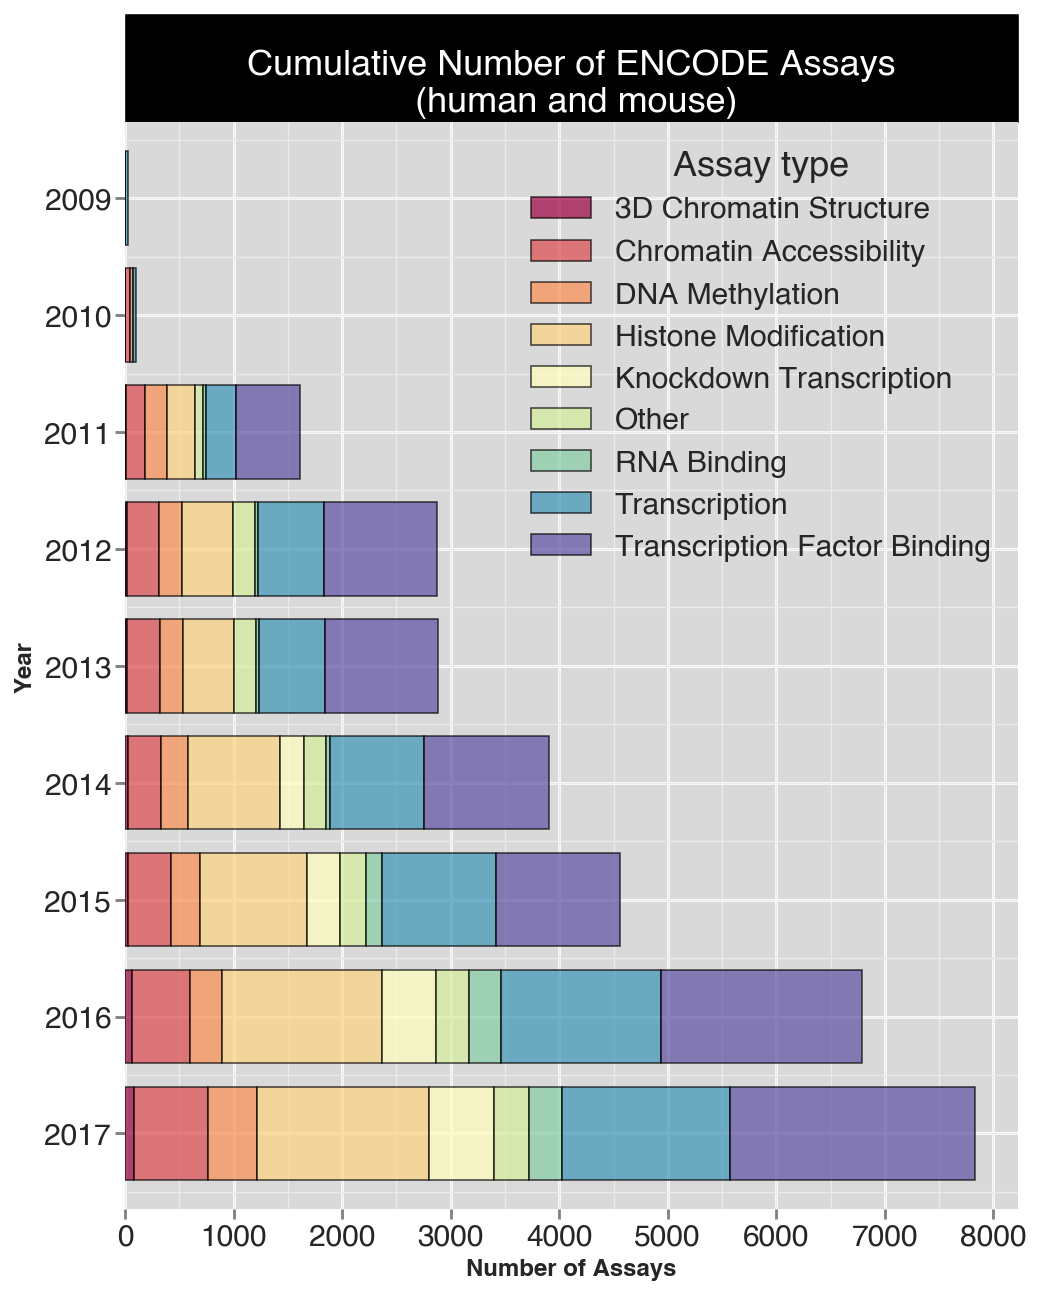

In [14]:
sns.set(font='Helvetica')
df = (expts.groupby(['Assay type', 'Date released'])
                .count()
                .unstack('Assay type')['Accession']
                .resample('A').sum()
                .cumsum()
                .fillna(method='ffill')
                .sort_index(ascending=False))
y_labels = [x.strftime('%Y') for x in df.index]
with sns.plotting_context("notebook", font_scale=1.5):
    fig, ax = plt.subplots(figsize=(8, 10))
    (
        df.plot(
            colormap='Spectral',
            alpha=0.7,
            ax=ax,
            linewidth=0.8,
            edgecolor='black',
            width=0.8,
            kind='barh',
            stacked=True
        )
    )
    fig.patches.append(
        patches.Rectangle(
            (0, 1),
            1,
            0.10,
            color='black',#'#CCCCCC',
            transform=ax.transAxes,
            zorder=-1
        )
    )
    ax.text(
        0.5,
        1.0035,
        'Cumulative Number of ENCODE Assays\n (human and mouse)',
        ha='center',
        va='bottom',
        color='white',
        transform=ax.transAxes,
        family='Helvetica',
        size=18
    )
    ax.set_yticklabels(y_labels)
    ax.set_ylabel('Year', weight='bold', size=12, family='Helvetica')
    ax.set_xlabel('Number of Assays', weight='bold', size=12, family='Helvetica')
    rstyle(ax)
    savefig('Fig1.png',bbox_inches='tight')

/Users/hitz/pyvenvs/jupyter/lib/python3.5/site-packages/matplotlib/font_manager.py:1316: UserWarning: findfont: Font family ['Quicksand'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


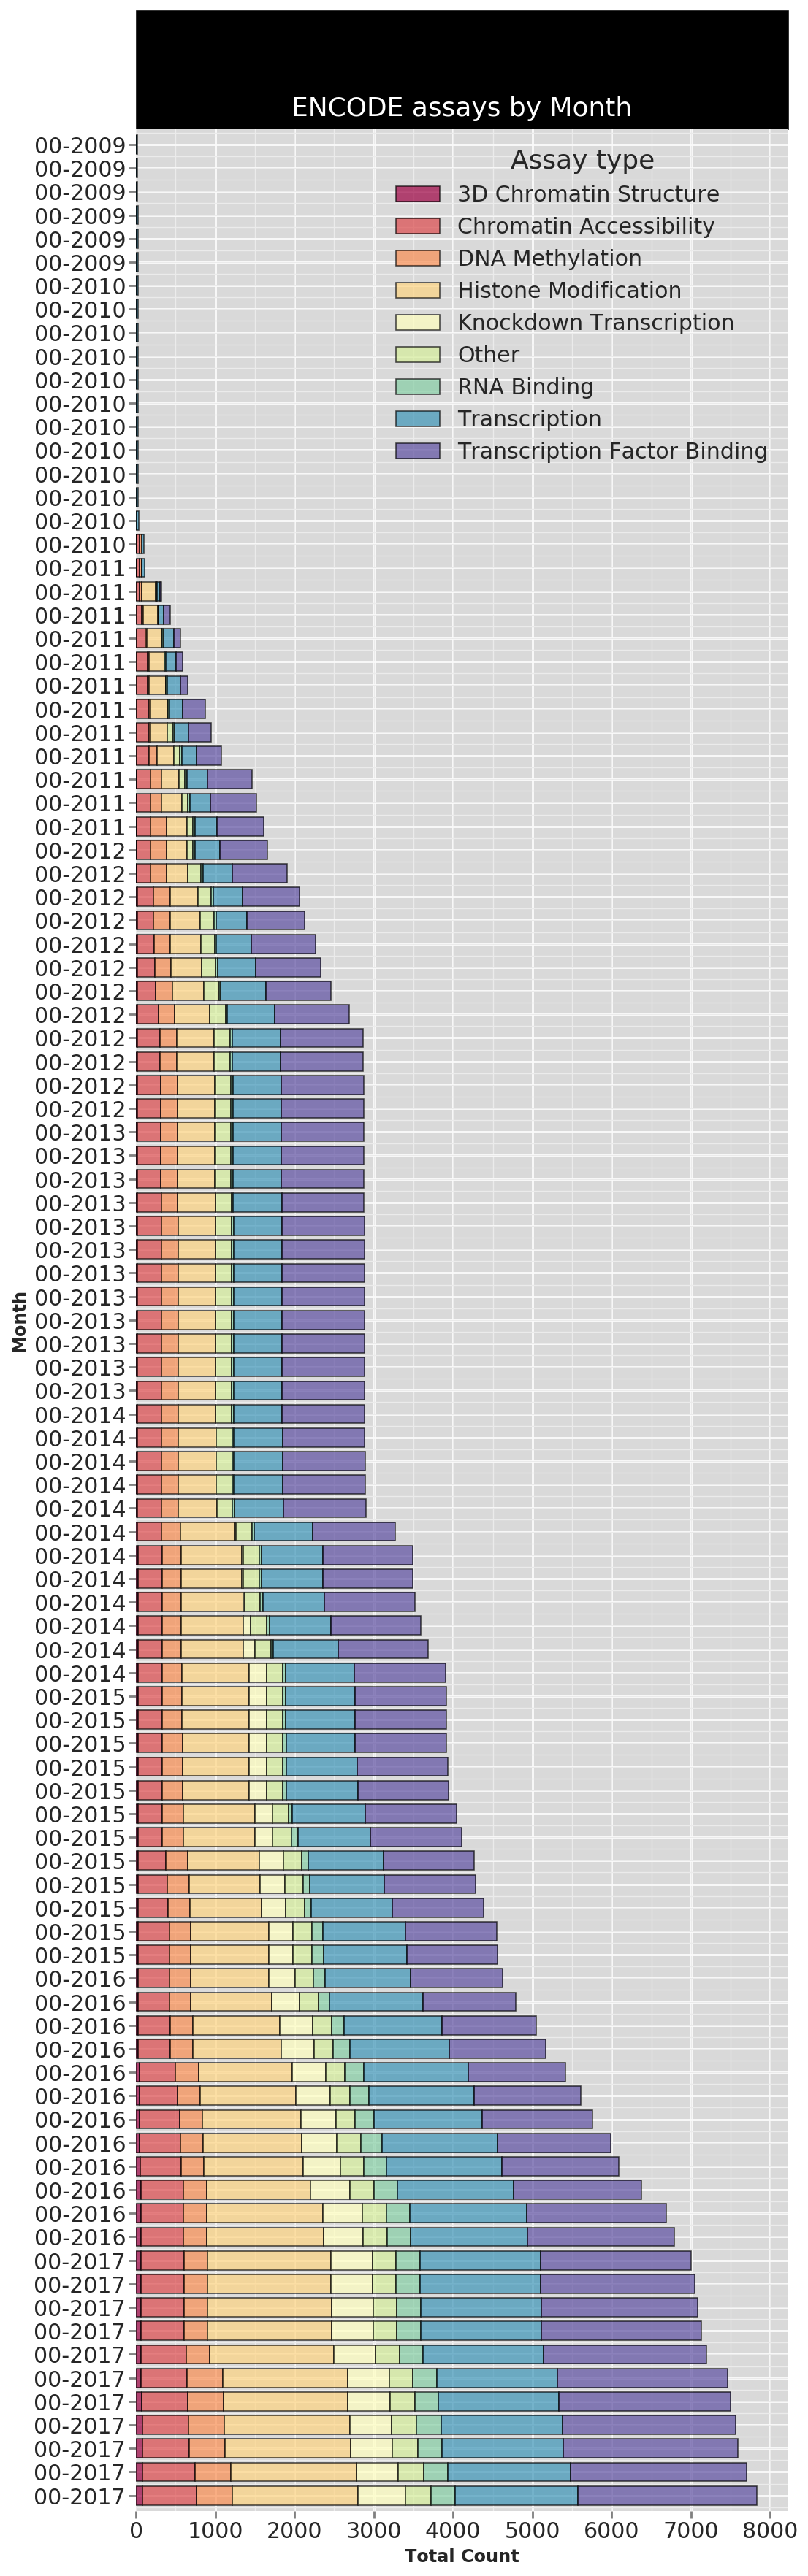

In [15]:
sns.set(font='Quicksand')
df = (expts.groupby(['Assay type', 'Date released'])
                .count()
                .unstack('Assay type')['Accession']
                .resample('M').sum()
                .cumsum()
                .fillna(method='ffill')
                .sort_index(ascending=False))
y_labels = [x.strftime('%M-%Y') for x in df.index]
with sns.plotting_context("notebook", font_scale=1.5):
    fig, ax = plt.subplots(figsize=(8, 30))
    (
        df.plot(
            colormap='Spectral',
            alpha=0.7,
            ax=ax,
            linewidth=0.8,
            edgecolor='black',
            width=0.8,
            kind='barh',
            stacked=True
        )
    )
    fig.patches.append(
        patches.Rectangle(
            (0, 1),
            1,
            0.05,
            color='black',#'#CCCCCC',
            transform=ax.transAxes,
            zorder=-1
        )
    )
    ax.text(
        0.5,
        1.0035,
        'ENCODE assays by Month',
        ha='center',
        va='bottom',
        color='white',
        transform=ax.transAxes,
        family='Quicksand',
        size=18
    )
    ax.set_yticklabels(y_labels)
    ax.set_ylabel('Month', weight='bold', size=12, family='Quicksand')
    ax.set_xlabel('Total Count', weight='bold', size=12, family='Quicksand')
    rstyle(ax)

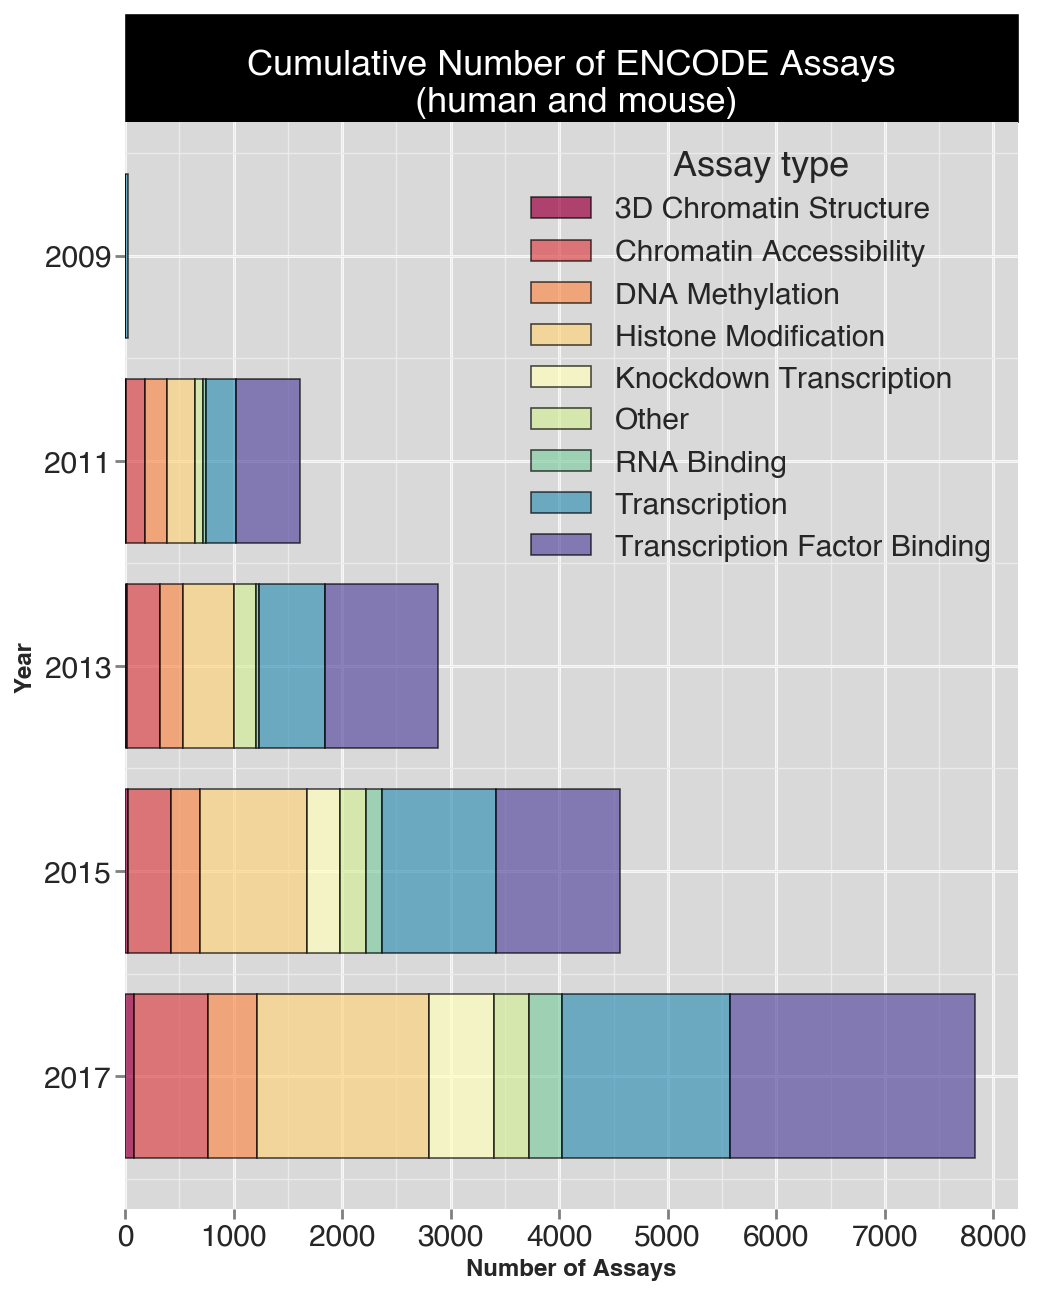

In [16]:
sns.set(font='Helvetica')
df = (expts.groupby(['Assay type', 'Date released'])
                .count()
                .unstack('Assay type')['Accession']
                .resample('2A').sum()
                .cumsum()
                .fillna(method='ffill')
                .sort_index(ascending=False))
y_labels = [x.strftime('%Y') for x in df.index]
with sns.plotting_context("notebook", font_scale=1.5):
    fig, ax = plt.subplots(figsize=(8, 10))
    (
        df.plot(
            colormap='Spectral',
            alpha=0.7,
            ax=ax,
            linewidth=0.8,
            edgecolor='black',
            width=0.8,
            kind='barh',
            stacked=True
        )
    )
    fig.patches.append(
        patches.Rectangle(
            (0, 1),
            1,
            0.10,
            color='black',#'#CCCCCC',
            transform=ax.transAxes,
            zorder=-1
        )
    )
    ax.text(
        0.5,
        1.0035,
        'Cumulative Number of ENCODE Assays\n (human and mouse)',
        ha='center',
        va='bottom',
        color='white',
        transform=ax.transAxes,
        family='Helvetica',
        size=18
    )
    ax.set_yticklabels(y_labels)
    ax.set_ylabel('Year', weight='bold', size=12, family='Helvetica')
    ax.set_xlabel('Number of Assays', weight='bold', size=12, family='Helvetica')
    rstyle(ax)
    savefig('Fig1-take2.png',bbox_inches='tight')

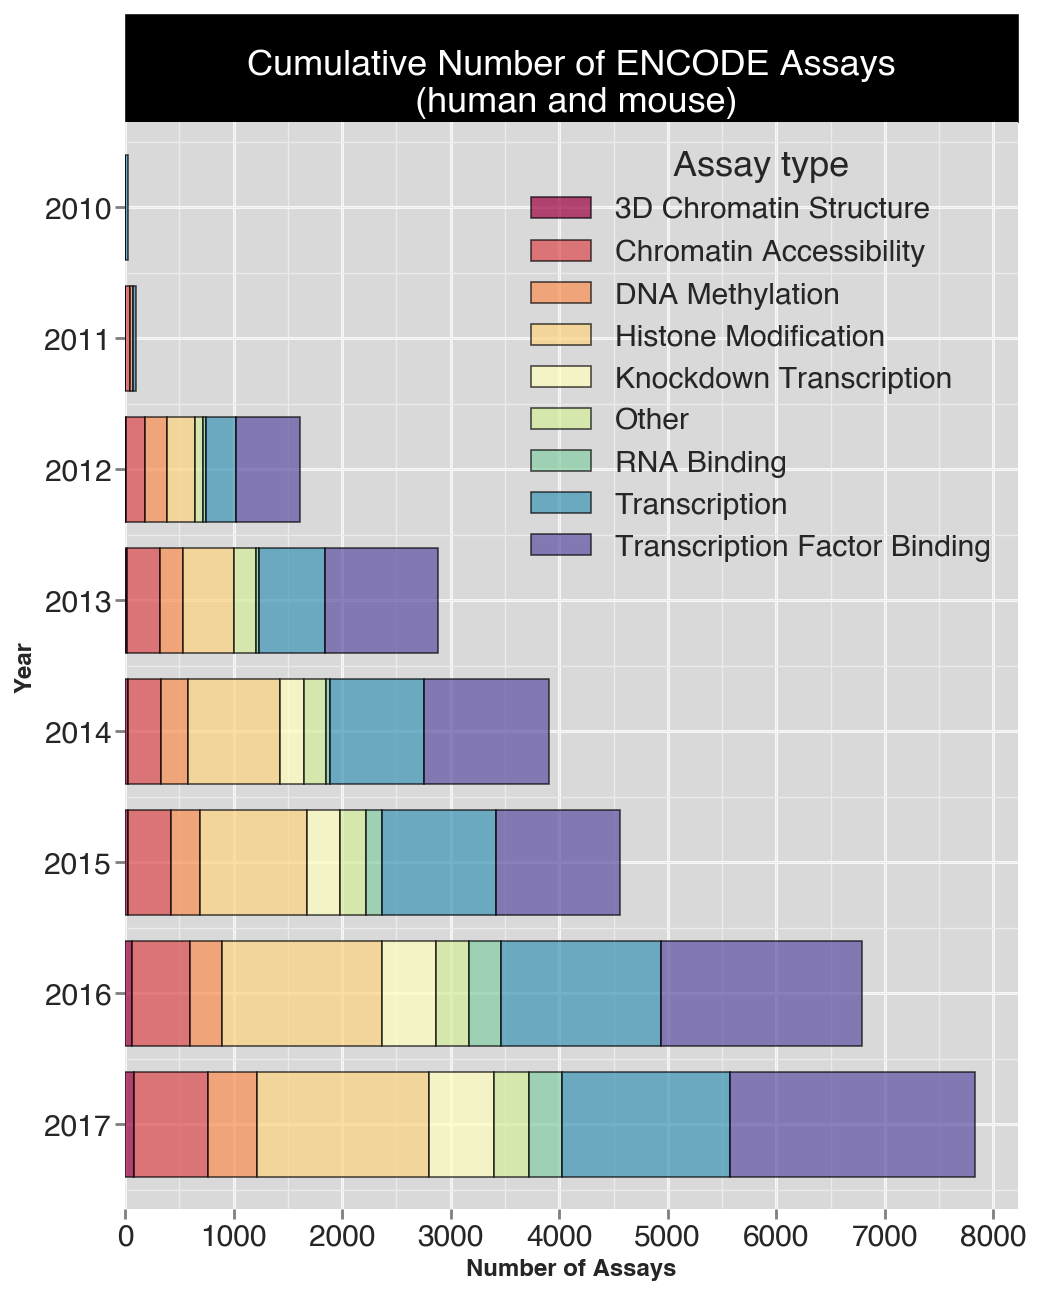

In [52]:
sns.set(font='Helvetica')
df = (expts.groupby(['Assay type', 'Date released'])
                .count()
                .unstack('Assay type')['Accession']
                .resample('A').sum()
                .cumsum()
                .fillna(method='ffill')
                .sort_index(ascending=False))

ddf = df.drop(index=datetime.datetime.strptime('2012-12-31','%Y-%m-%d'))
y_labels = [x.strftime('%Y') for x in df.index]
with sns.plotting_context("notebook", font_scale=1.5):
    fig, ax = plt.subplots(figsize=(8, 10))
    (
        ddf.plot(
            colormap='Spectral',
            alpha=0.7,
            ax=ax,
            linewidth=0.8,
            edgecolor='black',
            width=0.8,
            kind='barh',
            stacked=True
        )
    )
    fig.patches.append(
        patches.Rectangle(
            (0, 1),
            1,
            0.10,
            color='black',#'#CCCCCC',
            transform=ax.transAxes,
            zorder=-1
        )
    )
    ax.text(
        0.5,
        1.0035,
        'Cumulative Number of ENCODE Assays\n (human and mouse)',
        ha='center',
        va='bottom',
        color='white',
        transform=ax.transAxes,
        family='Helvetica',
        size=18
    )
    ax.set_yticklabels(y_labels)
    ax.set_ylabel('Year', weight='bold', size=12, family='Helvetica')
    ax.set_xlabel('Number of Assays', weight='bold', size=12, family='Helvetica')
    rstyle(ax)
    savefig('Fig1-take3.png',bbox_inches='tight')

In [17]:
hier = pd.read_csv('/Users/hitz/encode-prod/Experiments_2017_11_30_hierarchical.csv')

In [18]:
hier['Date released'] = hier['Date released'].apply(lambda x: pd.to_datetime(x))

In [19]:
hier.dtypes


Accession                    object
award.rfa                    object
award.pi.title               object
Unnamed: 3                  float64
Target label                 object
Target gene                  object
Biosample summary            object
Biosample                    object
Lab                          object
Project                      object
Species                      object
Biosample type               object
Date released        datetime64[ns]
Month released               object
Assay category               object
Assay Type                   object
Assay name                   object
Assay sub-class              object
dtype: object

In [20]:
hier

,Accession,award.rfa,award.pi.title,Unnamed: 3,Target label,Target gene,Biosample summary,Biosample,Lab,Project,Species,Biosample type,Date released,Month released,Assay category,Assay Type,Assay name,Assay sub-class
0,ENCSR618GKP,ENCODE3,Richard Myers,NaN,NaN,NaN,C57BL/6 limb embryo (12.5 days),limb,"Ali Mortazavi, UCI",ENCODE,Mus musculus,tissue,2017-08-15,"August, 2017",Transcription,RNA-seq,microRNA-seq,microRNA-seq
1,ENCSR000EAN,ENCODE2,Michael Snyder,NaN,RELA,RELA,GM12892 treated with tumor necrosis factor,GM12892,"Michael Snyder, Stanford",ENCODE,Homo sapiens,immortalized cell line,2011-10-29,"October, 2011",DNA binding,ChIP-seq,ChIP-seq,TF ChIP-seq
2,ENCSR668MJX,ENCODE3,Brenton Graveley,NaN,GRSF1,GRSF1,HepG2,HepG2,"Gene Yeo, UCSD",ENCODE,Homo sapiens,immortalized cell line,2016-04-26,"April, 2016",RNA binding,eCLIP,eCLIP,RNA binding protein
3,ENCSR000ARY,ENCODE2,Bradley Bernstein,NaN,H3K9ac,HIST2H3C,DND-41,DND-41,"Bradley Bernstein, Broad",ENCODE,Homo sapiens,immortalized cell line,2012-03-06,"March, 2012",DNA binding,ChIP-seq,ChIP-seq,Histone ChIP-seq
4,ENCSR290RXI,ENCODE3,Thomas Gingeras,NaN,NaN,NaN,myometrial cell female adult (34 years),myometrial cell,"Thomas Gingeras, CSHL",ENCODE,Homo sapiens,primary cell,2015-08-18,"August, 2015",Transcription,RNA-seq,RAMPAGE,RAMPAGE
5,ENCSR000EJH,ENCODE2,Gregory Crawford,NaN,NaN,NaN,GM13977,GM13977,"Gregory Crawford, Duke",ENCODE,Homo sapiens,immortalized cell line,2012-08-28,"August, 2012",DNA accessibility,DNase-seq,DNase-seq,DNase-seq
6,ENCSR861GYE,ENCODE3,Brenton Graveley,NaN,LIN28B,LIN28B,HepG2,HepG2,"Gene Yeo, UCSD",ENCODE,Homo sapiens,immortalized cell line,2015-11-09,"November, 2015",RNA binding,eCLIP,eCLIP,RNA binding protein
7,ENCSR000CGK,ENCODE2-Mouse,Bing Ren,NaN,H3K4me3,Hist2h3c1,B10.H-2aH-4bp/Wts CH12.LX,CH12.LX,"Bing Ren, UCSD",ENCODE,Mus musculus,immortalized cell line,2012-09-05,"September, 2012",DNA binding,ChIP-seq,ChIP-seq,Histone ChIP-seq
8,ENCSR082DIF,ENCODE3,David Gilbert,NaN,NaN,NaN,primitive gut cell originated from CyT49,primitive gut cell,"David Gilbert, FSU",ENCODE,Homo sapiens,in vitro differentiated cells,2015-07-21,"July, 2015",Replication timing,Repli-chip,Repli-chip,Repli-chip
9,ENCSR000APL,ENCODE2,Bradley Bernstein,NaN,H3K9me3,HIST2H3C,osteoblast,osteoblast,"Bradley Bernstein, Broad",ENCODE,Homo sapiens,primary cell,2011-02-10,"February, 2011",DNA binding,ChIP-seq,ChIP-seq,Histone ChIP-seq


In [21]:
data = ( 
    hier.groupby(['Assay category','Assay Type', 'Assay name', 'Assay sub-class'])
        .count()
)


In [22]:
data

Accession  \
Assay category         Assay Type                                         Assay name                     Assay sub-class                             
3D chromatin structure 5C                                                 5C                             5C                                     13   
                       ChIA-PET                                           ChIA-PET                       ChIA-PET                               39   
                       HiC                                                Hi-C                           Hi-C                                   30   
DNA accessibility      ATAC-seq                                           ATAC-seq                       ATAC-seq                              129   
                       DNase-seq                                          DNase-seq                      DNase-seq                             472   
                       FAIRE-seq                                          FAIRE-seq                      FAIRE-seq                              37   
                       MNase-seq                                          MNase-seq                      MNase-seq                               2   
                       genetic modification followed by DNase-seq         genetic modification DNase-seq genetic modification DNase-seq         40   
DNA binding            ChIP-seq                                           ChIP-seq                       Histone ChIP-seq                     1588   
                                                                                                         RNA binding protein                    22   
                                                                                                         TF ChIP-seq                          2243   
DNA methylation        DNA methylation profiling by array assay           DNAme array                    DNAme array                           259   
                       MRE-seq                                            MRE-seq                        MRE-seq                                 4   
                       MeDIP-seq                                          MeDIP-seq                      MeDIP-seq                               4   
                       RRBS                                               RRBS                           RRBS                                  103   
                       whole-genome shotgun bisulfite sequencing          WGBS                           WGBS                                   81   
Genotyping             DNA-PET                                            DNA-PET                        DNA-PET                                 6   
                       comparative genomic hybridization by array         genotyping array               genotyping array                      123   
                       genotyping by high throughput sequencing assay     genotyping HTS                 genotyping HTS                          9   
Proteomics             protein sequencing by tandem mass spectrometry ... MS-MS                          MS-MS                                  14   
RNA binding            RIP-chip                                           RIP-chip                       RNA binding protein                    18   
                       RIP-seq                                            RIP-seq                        RNA binding protein                    37   
                       RNA Bind-n-Seq                                     RNA Bind-n-Seq                 RNA binding protein                    77   
                                                                                                         transcription factor                    1   
                       Switchgear                                         Switchgear                     RNA binding protein                     2   
                       eCLIP                                              eCLIP        

In [23]:
dd = data['Accession']

In [24]:
dd

Assay category          Assay Type                                            Assay name                      Assay sub-class               
3D chromatin structure  5C                                                    5C                              5C                                  13
                        ChIA-PET                                              ChIA-PET                        ChIA-PET                            39
                        HiC                                                   Hi-C                            Hi-C                                30
DNA accessibility       ATAC-seq                                              ATAC-seq                        ATAC-seq                           129
                        DNase-seq                                             DNase-seq                       DNase-seq                          472
                        FAIRE-seq                                             FAIRE-seq                       FAIR